In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/Logistic Regression

# Importing Data

In [ ]:
train = pd.read_csv('titanic_train.csv')
train.shape

(891, 12)

In [ ]:
train.head()

### Embarked implies where the traveler mounted from. There are three possible values for Embark
### Southampton, Cherbourg, and Queenstown.

### SibSp is the number of siblings or spouse of a person onboard

###  Parch is the feature contained the number of parents or children each passenger was touring with.

# Check the Number of passengers died.

In [ ]:
train['Survived'].value_counts()  # 0 = died, 1 = lived  since 60% of passengers died

0    549
1    342
Name: Survived, dtype: int64

# Droping Irrelevant Features

In [ ]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True) # Removing as of no importance
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Checking For Null Values

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Replacing Null Values in "Age" with mean value of "Age"

In [ ]:
train.fillna(value = { "Age" : train['Age'].mean()}, inplace = True)

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Dropping the rows containing Null Values

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Creating Dummy Variables and dropping first column to avoid multicollinearity

In [ ]:
Sex = pd.get_dummies(train['Sex'])

In [ ]:
Sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
Sex = pd.get_dummies(train['Sex'],drop_first = True)
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
Embark = pd.get_dummies(train['Embarked'])
Embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
Embark = pd.get_dummies(train['Embarked'],drop_first = True)

# Adding dummy variables to original data

In [ ]:
train = pd.concat([train, Sex, Embark], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


# Removing Sex and Embarked because their dummy variables are created

In [ ]:
train.drop(['Sex', 'Embarked'], axis=1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Extracting features and labels

In [ ]:
X = train.drop(['Survived'], axis = 1).values

In [ ]:
y = train['Survived'].values

# Performing a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_test.shape

(178, 8)

# Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Logistic Regression

In [ ]:
model = LogisticRegression()
LR = model.fit(X_train, y_train)

# Getting Probabilities and Predictions from X_test

In [ ]:
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob

array([[0.90171004, 0.09828996],
       [0.04427065, 0.95572935],
       [0.21723447, 0.78276553],
       [0.7603059 , 0.2396941 ],
       [0.03863492, 0.96136508],
       [0.89788123, 0.10211877],
       [0.71811516, 0.28188484],
       [0.8708157 , 0.1291843 ],
       [0.07204575, 0.92795425],
       [0.03251234, 0.96748766],
       [0.62719188, 0.37280812],
       [0.41923427, 0.58076573],
       [0.96180334, 0.03819666],
       [0.8780622 , 0.1219378 ],
       [0.9053099 , 0.0946901 ],
       [0.8996572 , 0.1003428 ],
       [0.64549875, 0.35450125],
       [0.8541031 , 0.1458969 ],
       [0.74757619, 0.25242381],
       [0.90811257, 0.09188743],
       [0.7181652 , 0.2818348 ],
       [0.06111638, 0.93888362],
       [0.94777558, 0.05222442],
       [0.36627922, 0.63372078],
       [0.90809244, 0.09190756],
       [0.47587665, 0.52412335],
       [0.7094942 , 0.2905058 ],
       [0.11591004, 0.88408996],
       [0.48838207, 0.51161793],
       [0.72768075, 0.27231925],
       [0.

In [ ]:
y_pred = LR.predict(X_test)

# Observing class probabilities and class predictions

In [ ]:
df = pd.DataFrame({"Prob_class_0" : np.round(y_pred_prob[:,0], decimals = 2)
,"Prob_class_1": np.round(y_pred_prob[:,1], decimals = 2)
,"Predicted class": y_pred})
df

,Prob_class_0,Prob_class_1,Predicted class
0,0.90,0.10,0
1,0.04,0.96,1
2,0.22,0.78,1
3,0.76,0.24,0
4,0.04,0.96,1
...,...,...,...
173,0.85,0.15,0
174,0.28,0.72,1
175,0.65,0.35,0
176,0.70,0.30,0


# Calculating Accuracy

In [ ]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 77.53


# Generating Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[84, 25],
       [15, 54]])

In [ ]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

# Generating Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

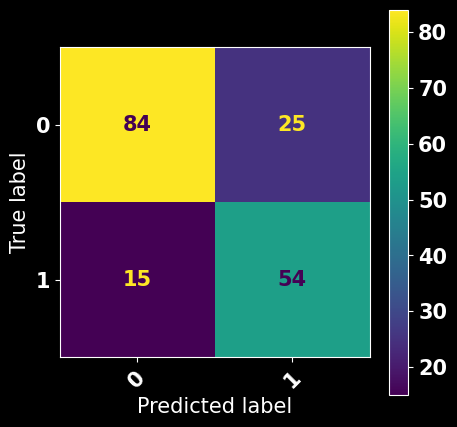

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

# Calculating Accuracy, Precision, Recall and F1-Score

In [ ]:
Accuracy = accuracy_score(y_test, y_pred, normalize=True).round(3)
Precision = precision_score(y_test, y_pred, average = 'macro').round(3)   # macro calculate the average value of classes.
Recall = recall_score(y_test, y_pred, average = 'macro').round(3)
F1_Score = f1_score(y_test, y_pred, average = 'macro').round(3)

print('Accuracy : ', Accuracy)
print(" ")
print('Precision : ', Precision)
print(" ")
print('Recall : ', Recall)
print(" ")
print('F1_Score : ', F1_Score)
print(" ")

Accuracy :  0.775
 
Precision :  0.766
 
Recall :  0.777
 
F1_Score :  0.769
 


# Printing Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



# Plotting ROC Curve

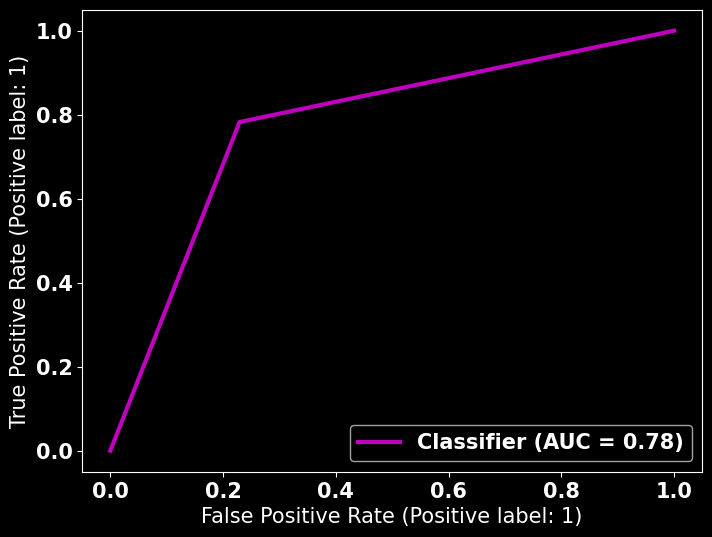

In [ ]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(1,1,figsize=(8,6))
RocCurveDisplay.from_predictions(y_test, y_pred, drop_intermediate = False, ax = ax, lw = 3, color ='m')
plt.show()

# Calculating Bias and Weights of Logistic Regression Model

In [ ]:
LR.intercept_

array([-0.66671712])

In [ ]:
LR.coef_

array([[-0.9528164 , -0.57494225, -0.44440861, -0.05567687,  0.07690223,
        -1.29195979, -0.02470336, -0.23482923]])